In [3]:
import pandas as pd
df = pd.read_csv('yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

In [4]:
df.tail()

,sentence,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=None),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [11]:
num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
25/25 - 1s - loss: 0.6935 - accuracy: 0.4725 - val_loss: 0.6926 - val_accuracy: 0.5800 - 1s/epoch - 41ms/step
Epoch 2/30
25/25 - 0s - loss: 0.6912 - accuracy: 0.5425 - val_loss: 0.6906 - val_accuracy: 0.5250 - 76ms/epoch - 3ms/step
Epoch 3/30
25/25 - 0s - loss: 0.6883 - accuracy: 0.5850 - val_loss: 0.6876 - val_accuracy: 0.5800 - 63ms/epoch - 3ms/step
Epoch 4/30
25/25 - 0s - loss: 0.6842 - accuracy: 0.6562 - val_loss: 0.6813 - val_accuracy: 0.7000 - 70ms/epoch - 3ms/step
Epoch 5/30
25/25 - 0s - loss: 0.6777 - accuracy: 0.6650 - val_loss: 0.6750 - val_accuracy: 0.6850 - 65ms/epoch - 3ms/step
Epoch 6/30
25/25 - 0s - loss: 0.6671 - accuracy: 0.7025 - val_loss: 0.6649 - val_accuracy: 0.6900 - 85ms/epoch - 3ms/step
Epoch 7/30
25/25 - 0s - loss: 0.6535 - accuracy: 0.7063 - val_loss: 0.6506 - val_accuracy: 0.7050 - 70ms/epoch - 3ms/step
Epoch 8/30
25/25 - 0s - loss: 0.6348 - accuracy: 0.7325 - val_loss: 0.6333 - val_accuracy: 0.7350 - 66ms/epoch - 3ms/step
Epoch 9/30
25/25 - 0s - l

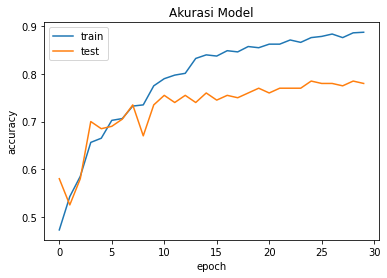

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

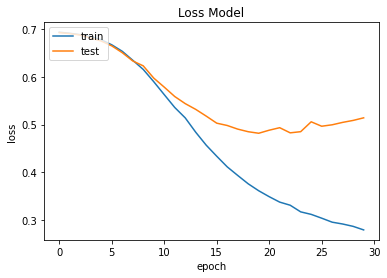

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()